In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
def array(x):
    return x
def parse_list_col(x):
    return eval(x)[0]
def mean_list_col(x):
    return pd.DataFrame(x.values.tolist()).apply("mean", axis = 0).values.tolist()
def std_list_col(x):
    x =  pd.DataFrame(x.values.tolist()).apply("std", axis = 0).values.tolist()
    # print(x)
    return x
def upper_conf_list_col(x):
    mean = mean_list_col(x)
    std = std_list_col(x)
    return (np.array(mean) + 1.96 * np.array(std)).tolist()
def lower_conf_list_col(x):
    mean = mean_list_col(x)
    std = std_list_col(x)
    return (np.array(mean) - 1.96 * np.array(std)).tolist()
    


In [2]:
df = pd.read_csv("../20201029162623-summary.csv")
df["fprs"] = df["fprs"].apply(parse_list_col)
df["tprs"] = df["tprs"].apply(parse_list_col)

In [4]:
df.head()
# std_list_col(df["fprs"])

,Unnamed: 0,fprs,tprs,roc_auc_scores,f1_scores,opt_func,loss_func,hidden_layer_size,layers_length
0,0,"[0.0, 0.00980392, 0.00980392, 0.02941176, 0.02...","[0.0, 0.0, 0.00943396, 0.00943396, 0.05660377,...",0.584721,0.675159,SGD,kullback_leibler_divergence,1,1
1,1,"[0.0, 0.00980392, 0.00980392, 0.02941176, 0.02...","[0.0, 0.0, 0.00943396, 0.00943396, 0.05660377,...",0.505457,0.675159,SGD,kullback_leibler_divergence,1,1
2,2,"[0.0, 0.00980392, 0.00980392, 0.02941176, 0.02...","[0.0, 0.0, 0.00943396, 0.00943396, 0.05660377,...",0.500231,0.675159,SGD,kullback_leibler_divergence,1,1
3,3,"[0.0, 0.00980392, 0.00980392, 0.02941176, 0.02...","[0.0, 0.0, 0.00943396, 0.00943396, 0.05660377,...",0.500000,0.675159,SGD,kullback_leibler_divergence,1,1
4,4,"[0.0, 0.00980392, 0.00980392, 0.02941176, 0.02...","[0.0, 0.0, 0.00943396, 0.00943396, 0.05660377,...",0.499769,0.675159,SGD,kullback_leibler_divergence,1,1


In [107]:
summary_df = df.groupby(["opt_func","loss_func","hidden_layer_size","layers_length"]).agg(
    mean_roc_auc_scores = ("roc_auc_scores","mean"),
    std_roc_auc_scores  = ("roc_auc_scores","std"),
    upper_conf_roc_auc_scores  = ("roc_auc_scores", lambda x: np.mean(x) + np.std(x)*1.96),
    lower_conf_roc_auc_scores  = ("roc_auc_scores", lambda x: np.mean(x) - np.std(x)*1.96),
    mean_f1_scores      = ("f1_scores","mean"),
    std_f1_scores       = ("f1_scores","std"),
    upper_conf_f1_scores  = ("roc_auc_scores", lambda x: np.mean(x) + np.std(x)*1.96),
    lower_conf_f1_scores  = ("roc_auc_scores", lambda x: np.mean(x) - np.std(x)*1.96),
    mean_fprs = ("fprs", mean_list_col),
    std_fprs = ("fprs", std_list_col),
    upper_conf_fprs = ("fprs", upper_conf_list_col),
    lower_conf_fprs = ("fprs", lower_conf_list_col),
    mean_tprs = ("tprs", mean_list_col),
    std_tprs = ("tprs", std_list_col),
    upper_conf_tprs = ("tprs", upper_conf_list_col),
    lower_conf_tprs = ("tprs", lower_conf_list_col),
).reset_index()
# print(summary_df)

In [109]:
summary_df_loss =  df.groupby(["loss_func"]).agg(
    mean_roc_auc_scores = ("roc_auc_scores","mean"),
    std_roc_auc_scores  = ("roc_auc_scores","std"),
    upper_conf_roc_auc_scores  = ("roc_auc_scores", lambda x: np.mean(x) + np.std(x)*1.96),
    lower_conf_roc_auc_scores  = ("roc_auc_scores", lambda x: np.mean(x) - np.std(x)*1.96),
    mean_f1_scores      = ("f1_scores","mean"),
    std_f1_scores       = ("f1_scores","std"),
    upper_conf_f1_scores  = ("roc_auc_scores", lambda x: np.mean(x) + np.std(x)*1.96),
    lower_conf_f1_scores  = ("roc_auc_scores", lambda x: np.mean(x) - np.std(x)*1.96),
    mean_fprs = ("fprs", mean_list_col),
    std_fprs = ("fprs", std_list_col),
    upper_conf_fprs = ("fprs", upper_conf_list_col),
    lower_conf_fprs = ("fprs", lower_conf_list_col),
    mean_tprs = ("tprs", mean_list_col),
    std_tprs = ("tprs", std_list_col),
    upper_conf_tprs = ("tprs", upper_conf_list_col),
    lower_conf_tprs = ("tprs", lower_conf_list_col),
).reset_index()
summary_df_loss.head()
summary_df_opt =  df.groupby(["opt_func"]).agg(
    mean_roc_auc_scores = ("roc_auc_scores","mean"),
    std_roc_auc_scores  = ("roc_auc_scores","std"),
    upper_conf_roc_auc_scores  = ("roc_auc_scores", lambda x: np.mean(x) + np.std(x)*1.96),
    lower_conf_roc_auc_scores  = ("roc_auc_scores", lambda x: np.mean(x) - np.std(x)*1.96),
    mean_f1_scores      = ("f1_scores","mean"),
    std_f1_scores       = ("f1_scores","std"),
    upper_conf_f1_scores  = ("roc_auc_scores", lambda x: np.mean(x) + np.std(x)*1.96),
    lower_conf_f1_scores  = ("roc_auc_scores", lambda x: np.mean(x) - np.std(x)*1.96),
    mean_fprs = ("fprs", mean_list_col),
    std_fprs = ("fprs", std_list_col),
    upper_conf_fprs = ("fprs", upper_conf_list_col),
    lower_conf_fprs = ("fprs", lower_conf_list_col),
    mean_tprs = ("tprs", mean_list_col),
    std_tprs = ("tprs", std_list_col),
    upper_conf_tprs = ("tprs", upper_conf_list_col),
    lower_conf_tprs = ("tprs", lower_conf_list_col),
).reset_index()
summary_df_opt.head()
summary_df_layer_l =  df.groupby(["layers_length"]).agg(
    mean_roc_auc_scores = ("roc_auc_scores","mean"),
    std_roc_auc_scores  = ("roc_auc_scores","std"),
    upper_conf_roc_auc_scores  = ("roc_auc_scores", lambda x: np.mean(x) + np.std(x)*1.96),
    lower_conf_roc_auc_scores  = ("roc_auc_scores", lambda x: np.mean(x) - np.std(x)*1.96),
    mean_f1_scores      = ("f1_scores","mean"),
    std_f1_scores       = ("f1_scores","std"),
    upper_conf_f1_scores  = ("roc_auc_scores", lambda x: np.mean(x) + np.std(x)*1.96),
    lower_conf_f1_scores  = ("roc_auc_scores", lambda x: np.mean(x) - np.std(x)*1.96),
    mean_fprs = ("fprs", mean_list_col),
    std_fprs = ("fprs", std_list_col),
    upper_conf_fprs = ("fprs", upper_conf_list_col),
    lower_conf_fprs = ("fprs", lower_conf_list_col),
    mean_tprs = ("tprs", mean_list_col),
    std_tprs = ("tprs", std_list_col),
    upper_conf_tprs = ("tprs", upper_conf_list_col),
    lower_conf_tprs = ("tprs", lower_conf_list_col),
).reset_index()
summary_df_layer_l.head()
summary_df_layer_s =  df.groupby(["hidden_layer_size"]).agg(
    mean_roc_auc_scores = ("roc_auc_scores","mean"),
    std_roc_auc_scores  = ("roc_auc_scores","std"),
    upper_conf_roc_auc_scores  = ("roc_auc_scores", lambda x: np.mean(x) + np.std(x)*1.96),
    lower_conf_roc_auc_scores  = ("roc_auc_scores", lambda x: np.mean(x) - np.std(x)*1.96),
    mean_f1_scores      = ("f1_scores","mean"),
    std_f1_scores       = ("f1_scores","std"),
    upper_conf_f1_scores  = ("roc_auc_scores", lambda x: np.mean(x) + np.std(x)*1.96),
    lower_conf_f1_scores  = ("roc_auc_scores", lambda x: np.mean(x) - np.std(x)*1.96),
    mean_fprs = ("fprs", mean_list_col),
    std_fprs = ("fprs", std_list_col),
    upper_conf_fprs = ("fprs", upper_conf_list_col),
    lower_conf_fprs = ("fprs", lower_conf_list_col),
    mean_tprs = ("tprs", mean_list_col),
    std_tprs = ("tprs", std_list_col),
    upper_conf_tprs = ("tprs", upper_conf_list_col),
    lower_conf_tprs = ("tprs", lower_conf_list_col),
).reset_index()
summary_df_layer_s.head()

,hidden_layer_size,mean_roc_auc_scores,std_roc_auc_scores,upper_conf_roc_auc_scores,lower_conf_roc_auc_scores,mean_f1_scores,std_f1_scores,upper_conf_f1_scores,lower_conf_f1_scores,mean_fprs,std_fprs,upper_conf_fprs,lower_conf_fprs,mean_tprs,std_tprs,upper_conf_tprs,lower_conf_tprs
0,1,0.500260,0.005259,0.510548,0.489973,0.225053,0.318864,0.510548,0.489973,"[0.0, 0.9633260711111111, 0.009803919999999999...","[0.0, 0.18734834225739772, 1.828559098217032e-...","[0.0, 1.3305288219356106, 0.009803920000000002...","[0.0, 0.5961233202866116, 0.009803919999999995...","[0.0, 0.9629629629629629, 0.009433960000000002...","[0.0, 0.18920327603942325, 1.828559098217032e-...","[0.0, 1.3338013840002325, 0.009433960000000005...","[0.0, 0.5921245419256933, 0.009433959999999998..."
1,5,0.539125,0.091043,0.717238,0.361012,0.516076,0.252081,0.717238,0.361012,"[0.0, 0.19535221444444498, 0.22285067807692285...","[0.0, 0.3386160543438579, 0.3605183171756997, ...","[0.0, 0.8590396809584064, 0.9294665797412942, ...","[0.0, -0.46833525206951654, -0.483765223587448...","[0.0, 0.21977637925925947, 0.21770682038461567...","[0.0, 0.36913978128923175, 0.38949242337816237...","[0.0, 0.9432903505861536, 0.9811119702058139, ...","[0.0, -0.5037375920676348, -0.5456983294365826..."
2,10,0.545685,0.085734,0.713412,0.377958,0.511636,0.277086,0.713412,0.377958,"[0.0, 0.2559912844444445, 0.11229946318181816,...","[0.0, 0.4242577466108198, 0.2802052846134307, ...","[0.0, 1.0875364678016513, 0.6615018210241423, ...","[0.0, -0.5755538989127622, -0.436902894660506,...","[0.0, 0.26135569444444434, 0.10205831772727278...","[0.0, 0.43386020385240487, 0.2849027846187604,...","[0.0, 1.111721693995158, 0.6604677755800432, 0...","[0.0, -0.5890103051062692, -0.4563511401254976..."
3,50,0.554600,0.086636,0.724091,0.385109,0.544040,0.243341,0.724091,0.385109,"[0.0, 0.17465504629629644, 0.15176470480000018...","[0.0, 0.3518850680208632, 0.3124471950995607, ...","[0.0, 0.8643497796171884, 0.7641612071951391, ...","[0.0, -0.5150396870245955, -0.4606317975951388...","[0.0, 0.18413696629629608, 0.16339622479999985...","[0.0, 0.3623238611944702, 0.3325559509207513, ...","[0.0, 0.8942917342374576, 0.8152058886046724, ...","[0.0, -0.5260178016448654, -0.4884134390046727..."


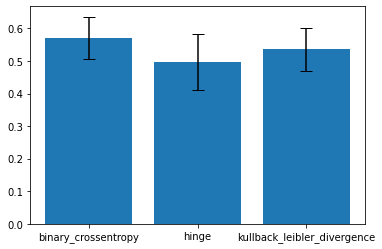

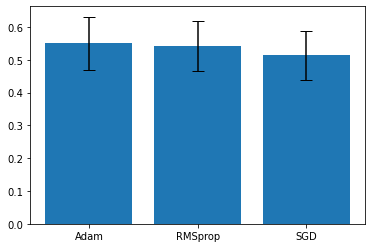

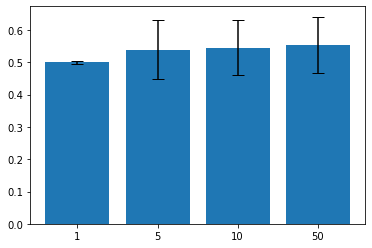

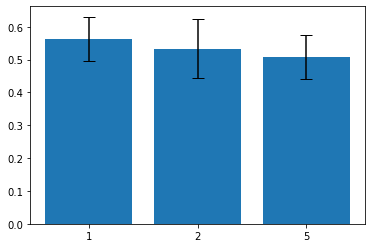

In [31]:
%matplotlib inline
plt.bar(summary_df_loss.loss_func, summary_df_loss.mean_roc_auc_scores, yerr = summary_df_loss.std_roc_auc_scores, capsize = 6)
plt.show()
plt.bar(summary_df_opt.opt_func, summary_df_opt.mean_roc_auc_scores, yerr = summary_df_opt.std_roc_auc_scores, capsize = 6)
plt.show()
plt.bar(summary_df_layer_s.hidden_layer_size.apply(str), summary_df_layer_s.mean_roc_auc_scores, yerr = summary_df_layer_s.std_roc_auc_scores, capsize = 6)
plt.show()
plt.bar(summary_df_layer_l.layers_length.apply(str), summary_df_layer_l.mean_roc_auc_scores, yerr = summary_df_layer_l.std_roc_auc_scores, capsize = 6)
plt.show()

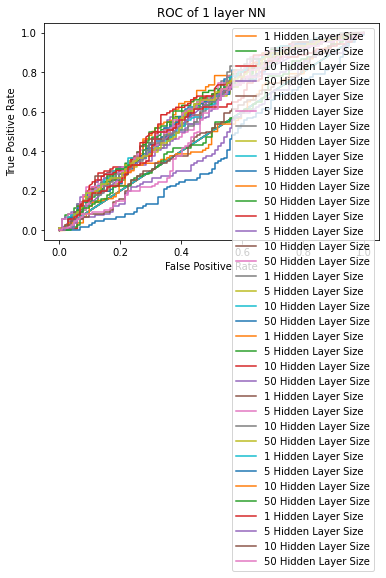

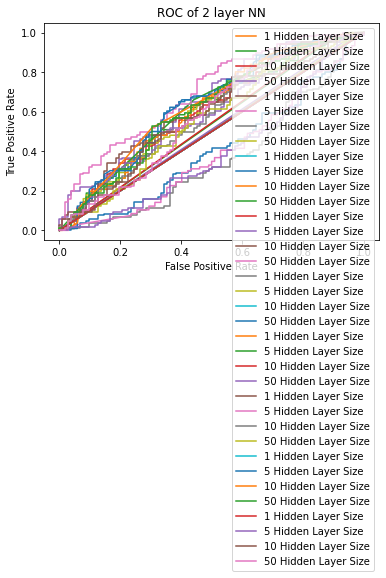

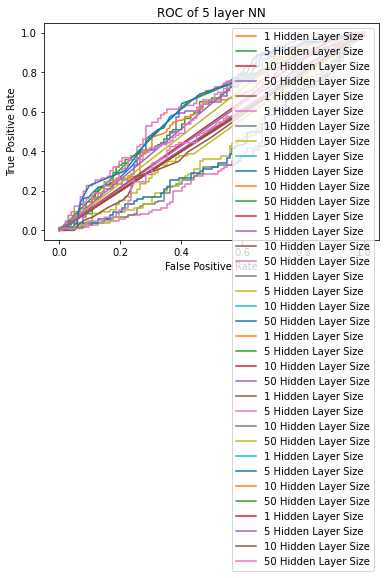

In [75]:
    
for x in summary_df.layers_length.unique().tolist():
    plt.clf()
    plt.plot([0, 1], [0, 1], linestyle="--", label="")
    for _, row in summary_df[summary_df["layers_length"] == x].iterrows():
#         print(row["hidden_layer_size"])
#         print(row["mean_fprs"])
#         print(row["mean_tprs"])
        fpr = row["mean_fprs"]
        tpr = row["mean_tprs"]
#         print(type(fpr))
        h_size = row["hidden_layer_size"]
        lbl=f"{h_size} Hidden Layer Size"
#         print(lbl)
        plt.plot(
            fpr,
            tpr,
            linestyle="-",
            label=lbl
    )
    tlt = f"ROC of {x} layer NN"
    plt.title(tlt)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()


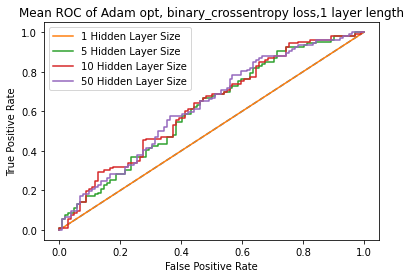

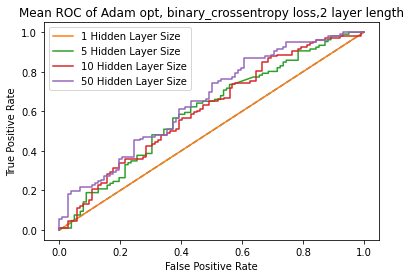

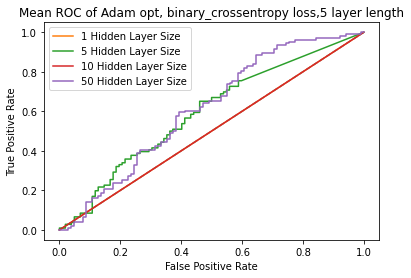

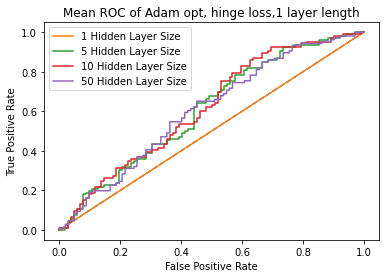

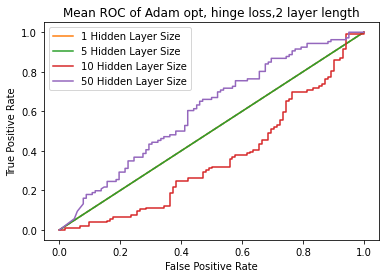

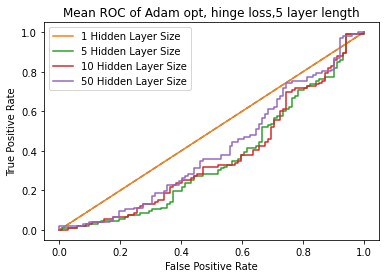

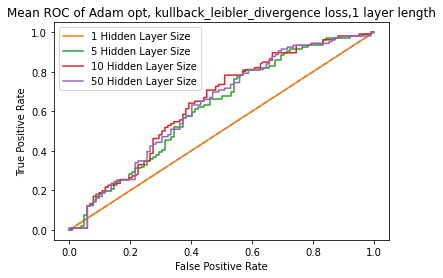

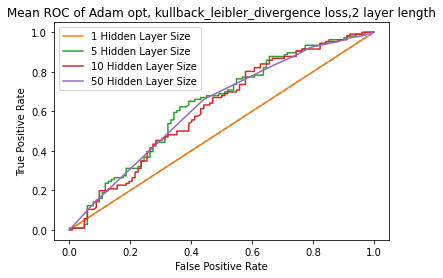

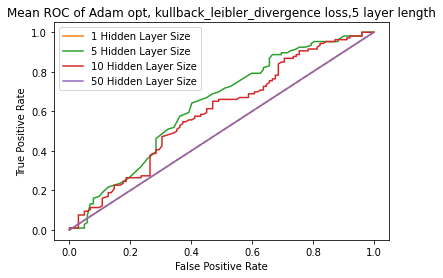

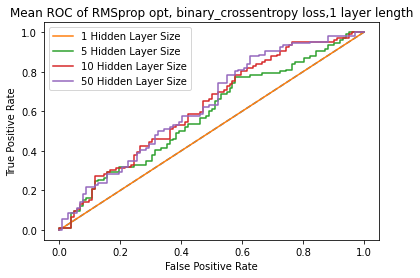

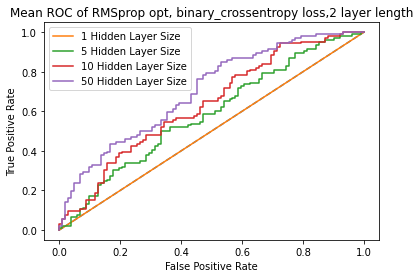

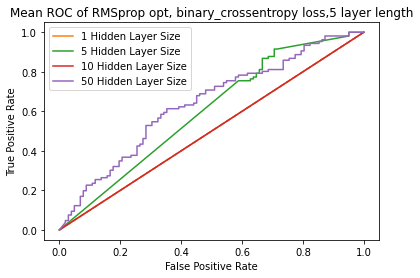

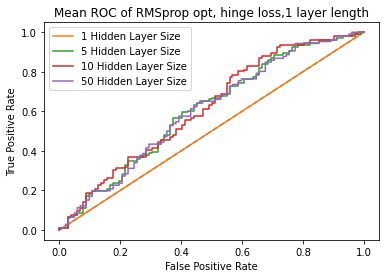

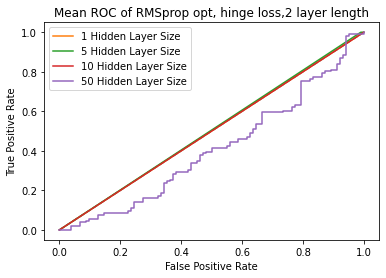

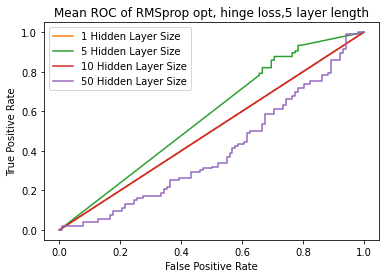

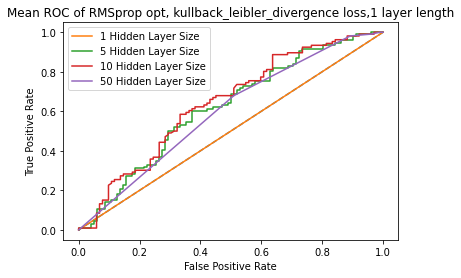

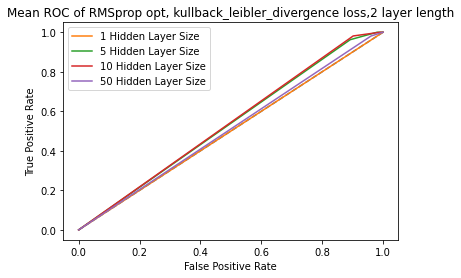

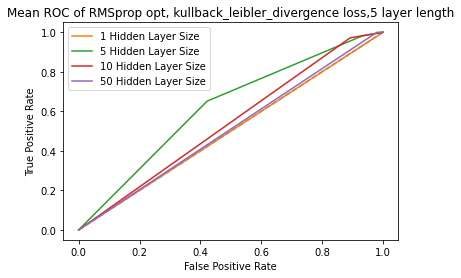

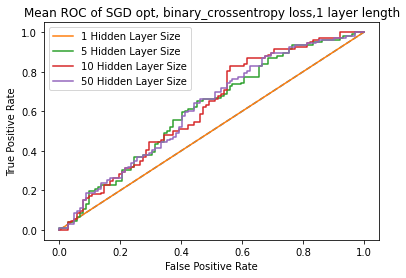

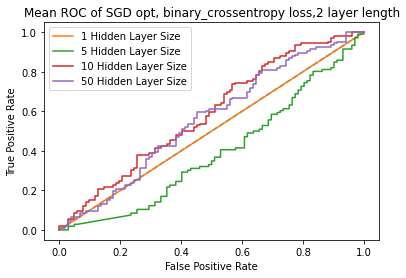

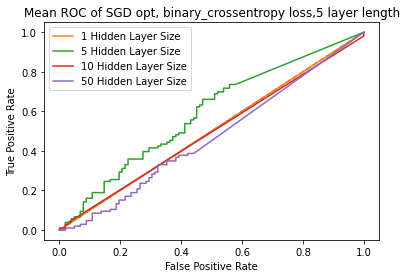

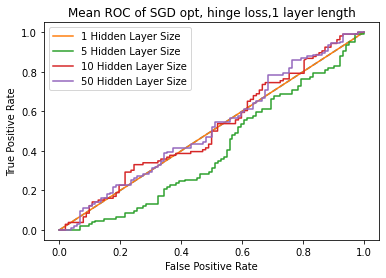

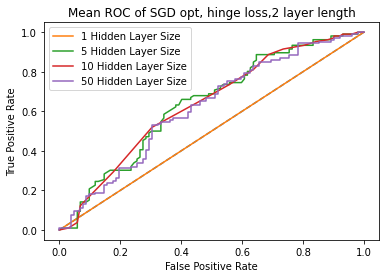

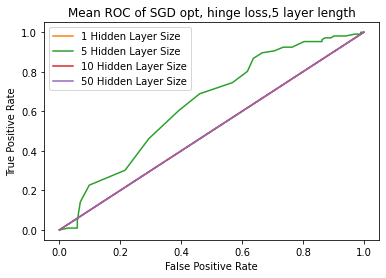

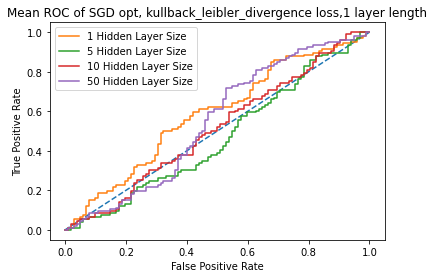

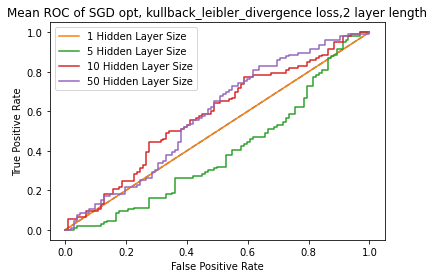

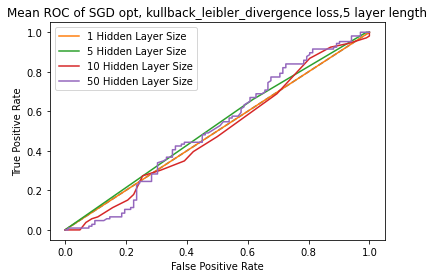

In [128]:
for x in summary_df.opt_func.unique().tolist():
    for y in summary_df.loss_func.unique().tolist():
        for z in summary_df.layers_length.unique().tolist():
#           plt.clf()
            plt.plot([0, 1], [0, 1], linestyle="--", label="")
            for _, row in summary_df[(summary_df["opt_func"] == x) & (summary_df["loss_func"] == y) & (summary_df["layers_length"] == z)].iterrows():
#             print(row)
#             print(row["hidden_layer_size"])
#             print(row["mean_fprs"])
#                 print(row["mean_tprs"])
                fpr = row["mean_fprs"]
                tpr = row["mean_tprs"]
#             print(type(fpr))
                h_size = row["hidden_layer_size"]
#                 l_layers = row["layers_length"]
                lbl=f"{h_size} Hidden Layer Size"
#             print(lbl)
                plt.plot(
                fpr,
                tpr,
                linestyle="-",
                label=lbl
                )
#                 print(row["lower_conf_tprs"], row["upper_conf_tprs"])

            tlt = f"Mean ROC of {x} opt, {y} loss,{z} layer length"
            plt.title(tlt)
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.legend()
            plt.savefig(f"{tlt}.png", dpi = 1000)
            plt.show()
    